# 二つの銘柄の波形を比較する
今回は、コンテナ船に関する二つの銘柄ZIMとGOGLを比較してみます。

In [1]:
import numpy as np
import pandas as pd
from IPython.display import display, HTML
from utils import get_finance_data, get_rsi

In [2]:
# 銘柄名、期間、保存先ファイル
ticker_symbol1 = "ZIM"
ticker_symbol2 = "GOGL"
start = "2021-05-01"
end = "2021-06-30"

# データを取得する
df1 = get_finance_data(ticker_symbol1, start=start, end=end, savedir="../data")
df2 = get_finance_data(ticker_symbol2, start=start, end=end, savedir="../data")

display(HTML(f"<h1>{ticker_symbol1}</h1>"))
display(df1.head())

display(HTML(f"<h1>{ticker_symbol2}</h1>"))
display(df2.head())

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-30,38.220001,34.599998,35.250000,37.450001,1055800,34.039406
2021-05-03,40.000000,37.830002,38.419998,38.439999,1317100,34.939247
2021-05-04,39.849998,35.560001,38.439999,39.660000,1729800,36.048141
2021-05-05,42.990002,39.740002,40.049999,41.930000,2149900,38.111412
2021-05-06,42.005001,37.549999,41.900002,39.380001,1985300,35.793644


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-30,8.78,8.69,8.74,8.70,599200.0,7.421661
2021-05-03,9.49,9.05,9.11,9.35,1667000.0,7.976153
2021-05-04,9.39,9.00,9.27,9.15,1577100.0,7.805540
2021-05-05,9.33,9.06,9.27,9.11,1355600.0,7.771418
2021-05-06,8.85,8.44,8.58,8.84,1282500.0,7.541090


## グラフを表示する
### 単純に並べて表示してみる

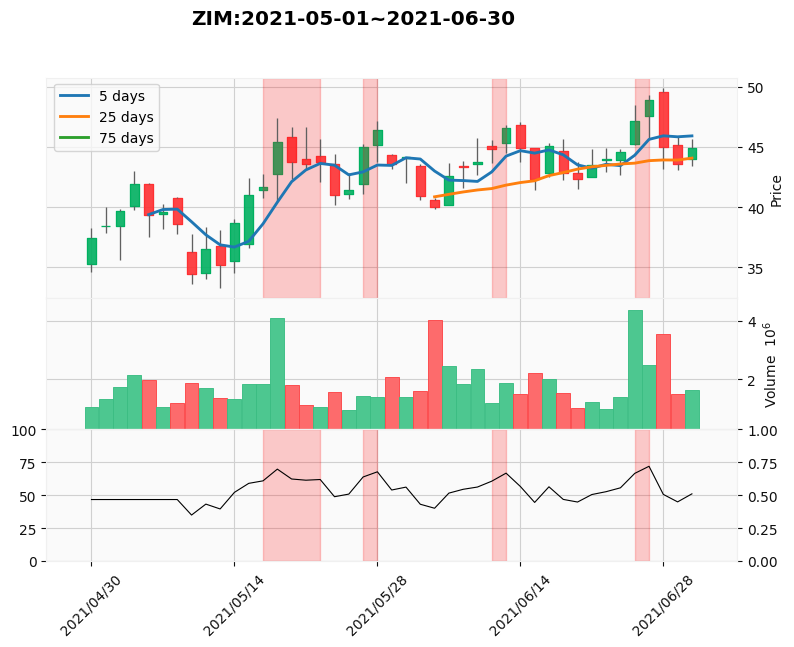

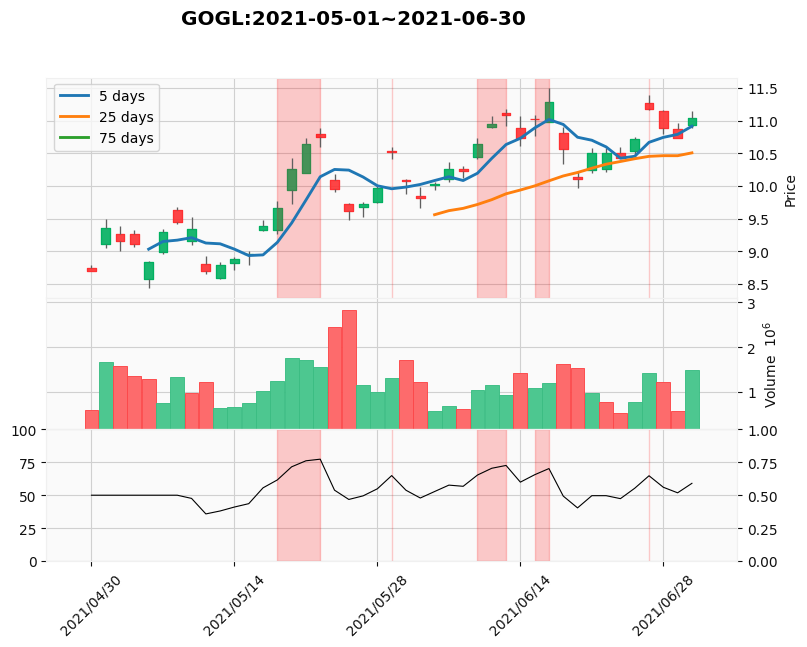

In [3]:
import mplfinance as mpf


def plot_OHLC(df, n=7, rsi_threshold=70, title=""):
    cond_true_spans = []
    span = None
    is_true_span = False
    df["rsi"] = get_rsi(df["Close"], n=n)

    for i, rsi_i in enumerate(df["rsi"]):
        if rsi_i > rsi_threshold and not is_true_span:
            is_true_span = True
            span = [i, 0]
        elif rsi_i < rsi_threshold and is_true_span:
            is_true_span = False
            span[1] = i - 1
            cond_true_spans.append(span)
        else:
            pass

    apd = mpf.make_addplot(
        df["rsi"], panel=2, color="#000", ylim=(0, 100), secondary_y=True, width=0.8
    )

    fig, axes = mpf.plot(
        df,
        type="candle",
        style="yahoo",
        volume=True,
        mav=[5, 25, 75],
        addplot=apd,
        panel_ratios=(1, 0.6),
        datetime_format="%Y/%m/%d",
        returnfig=True,
        figscale=1.2,
    )
    fig.legend(
        [f"{days} days" for days in [5, 25, 75]],
        bbox_to_anchor=(0.0, 0.78, 0.305, 0.102),
    )

    for span in cond_true_spans:
        axes[0].axvspan(span[0], span[1], color="red", alpha=0.2)
        axes[-1].axvspan(span[0], span[1], color="red", alpha=0.2)

    fig.suptitle(f"{title}")


plot_OHLC(df1, n=7, rsi_threshold=60, title=f"{ticker_symbol1}:{start}~{end}")
plot_OHLC(df2, n=7, rsi_threshold=60, title=f"{ticker_symbol2}:{start}~{end}")

###  グラフを重ねて比較する
重ねてみると、二つの銘柄の動きはほぼ同じような形だとわかります。

[matplotlib.axes.Axes.twinx](https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.twinx.html)

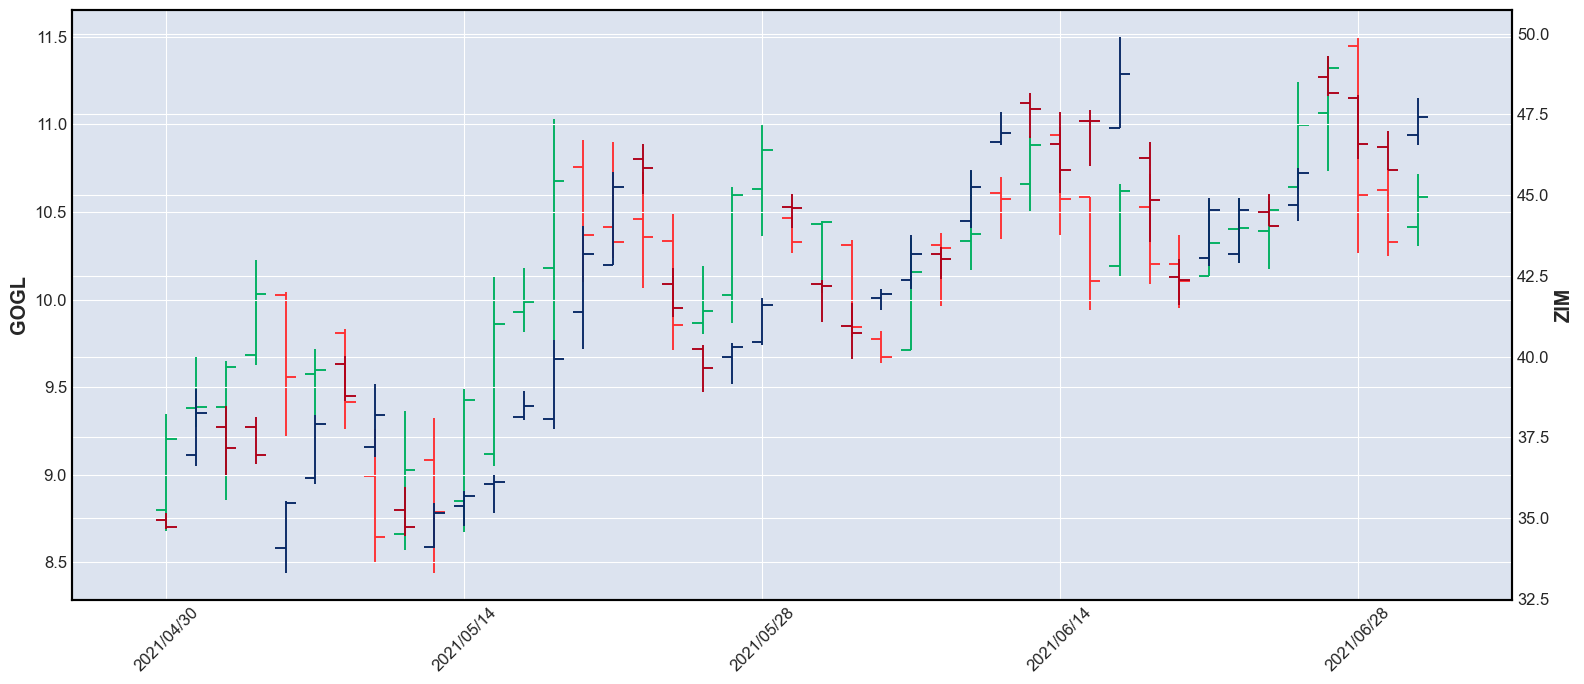

In [4]:
df1["rsi"] = get_rsi(df1["Close"], n=7)

fig = mpf.figure(figsize=(16, 7), tight_layout=True, style="default")
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
mpf.plot(df1, type="ohlc", style="yahoo", datetime_format="%Y/%m/%d", ax=ax1)
ax1.set_ylabel(f"{ticker_symbol1}")

mpf.plot(
    df2,
    type="ohlc",
    style="starsandstripes",
    datetime_format="%Y/%m/%d",
    ax=ax2,
)

# 左側にラベルを表示する
ax2.tick_params(labelleft=True, labelright=False)
ax2.set_ylabel(f"{ticker_symbol2}")
ax2.yaxis.set_label_position("left")

### 二つの時系列の相関を求める
[pandas.Series.corr](https://pandas.pydata.org/docs/reference/api/pandas.Series.corr.html)

In [5]:
df1["Close"].corr(df2["Close"])

0.7909202369547956